In [10]:
import os
        
import time 
import datetime
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

from scipy import interpolate

import statsmodels.api as sm

import missingno as msno 

import warnings
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd

In [12]:
data = pd.read_csv('rul_hrs.csv')
#data.set_index('timestamp',inplace=True)

In [13]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [14]:
data.head()

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0  2018-04-01 0:00   2.465394   47.09201    53.2118  46.310760   634.3750   
1  2018-04-01 0:01   2.465394   47.09201    53.2118  46.310760   634.3750   
2  2018-04-01 0:02   2.444734   47.35243    53.2118  46.397570   638.8889   
3  2018-04-01 0:03   2.460474   47.09201    53.1684  46.397568   628.1250   
4  2018-04-01 0:04   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_42  sensor_43  \
0   76.45975   13.41146   16.13136   15.56713  ...  31.770832   41.92708   
1   76.45975   13.41146   16.13136   15.56713  ...  31.770832   41.92708   
2   73.54598   13.32465   16.03733   15.61777  ...  31.770830   41.66666   
3   76.98898   13.31742   16.24711   15.69734  ...  31.510420   40.88541   
4   76.58897   13.35359   16.21094   15.69734  ...  31.510420   41.40625   

   sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
0  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
1  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
2  39.351852   65.39352   51.21528  38.194443   155.9606   67.12963   
3  39.062500   64.81481   51.21528  38.194440   155.9606   66.84028   
4  38.773150   65.10416   51.79398  38.773150   158.2755   66.55093   

   sensor_51         rul  
0   201.3889  285.916667  
1   201.3889  285.900000  
2   203.7037  285.883333  
3   203.1250  285.866667  
4   201.3889  285.850000  

[5 rows x 52 columns]

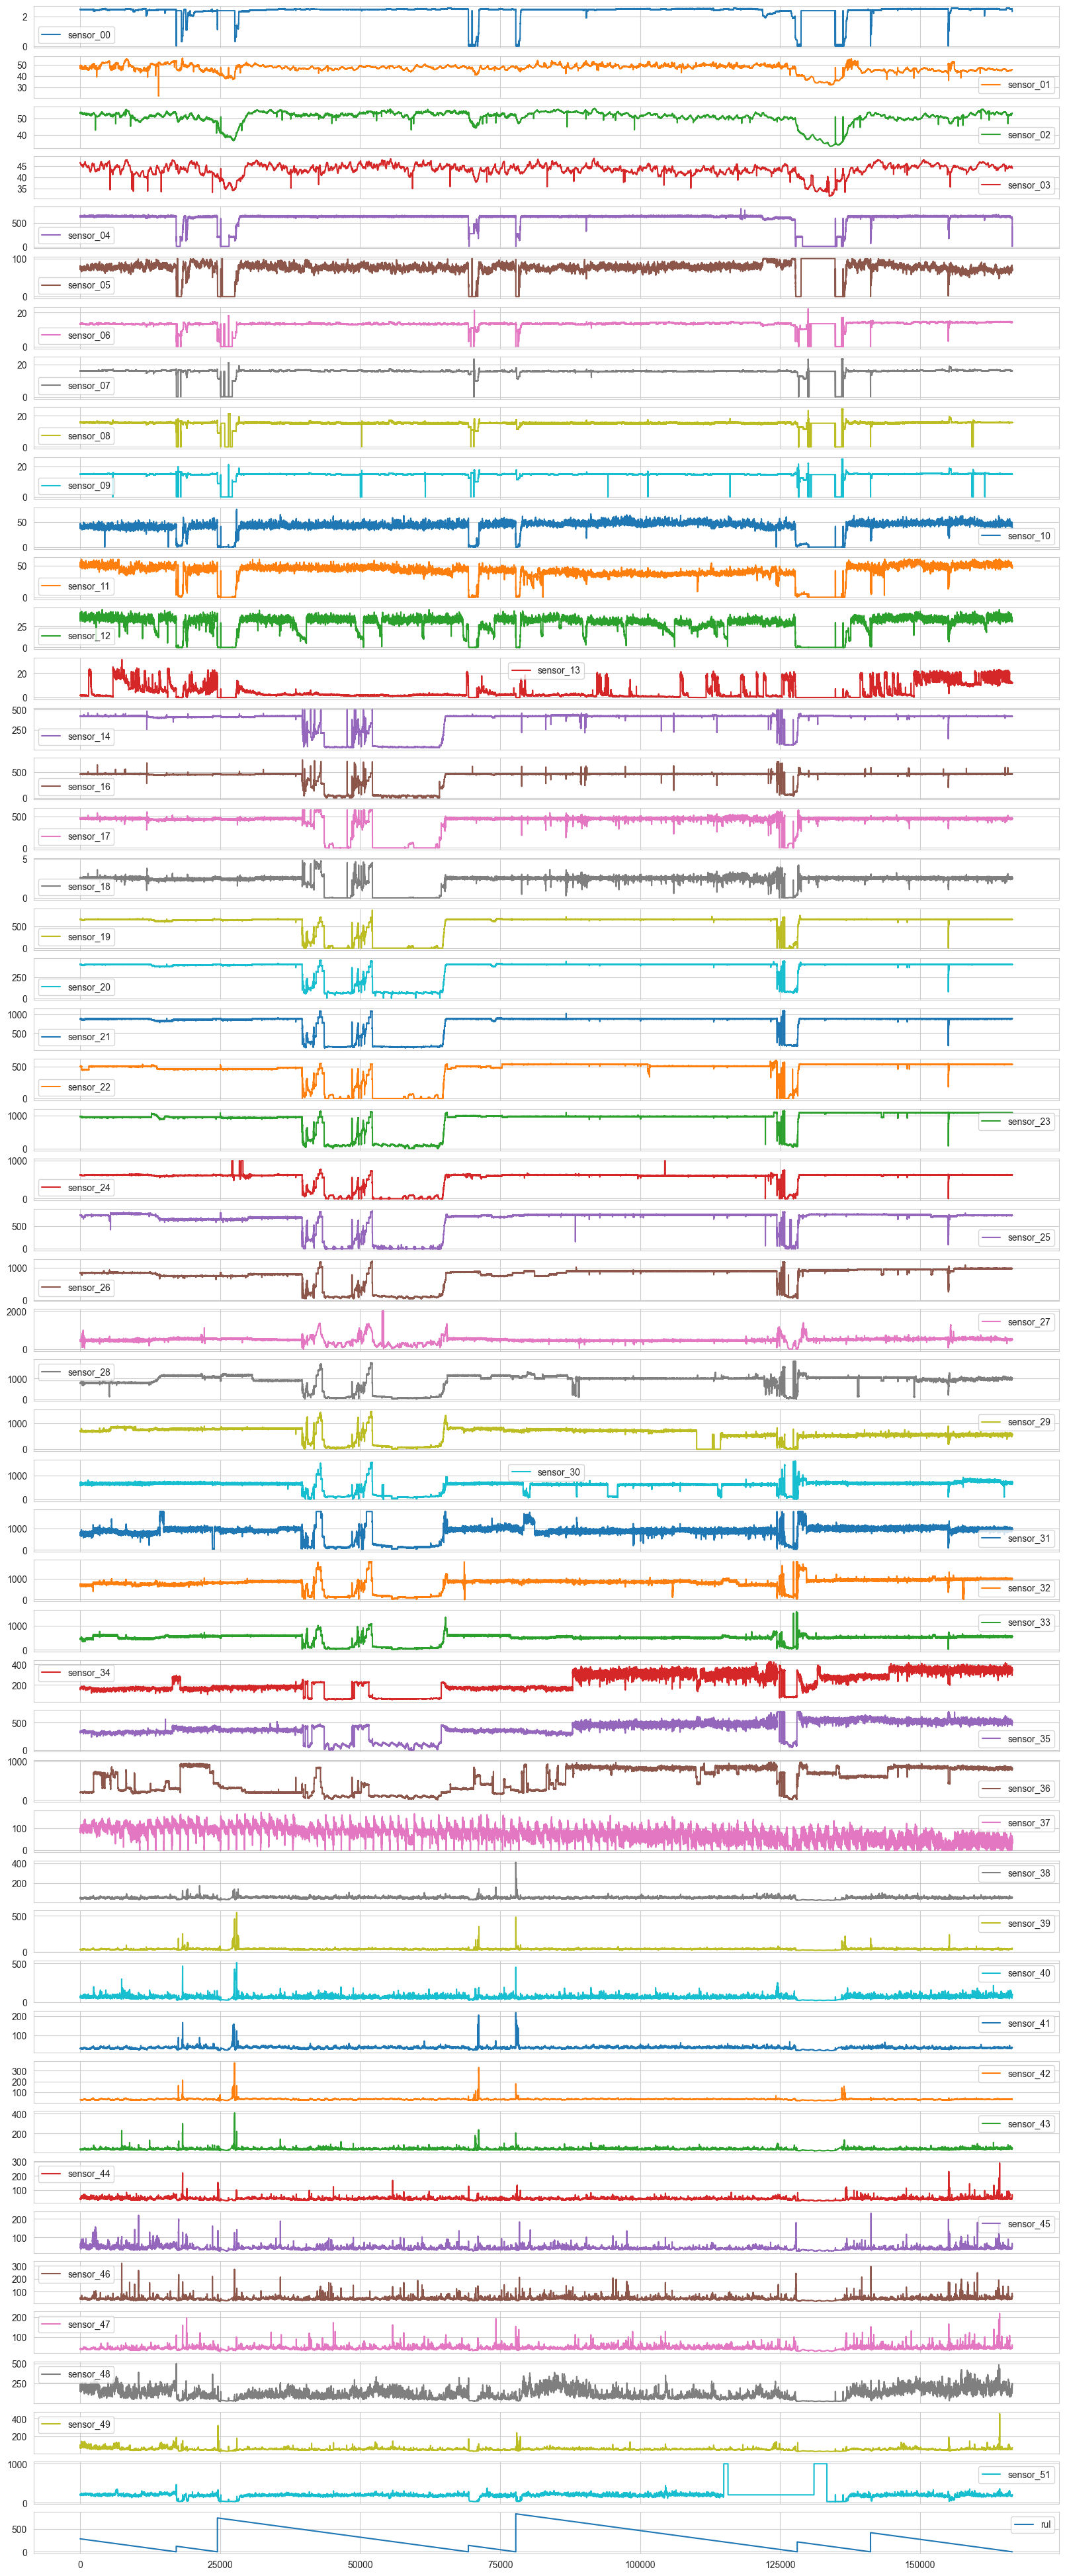

In [15]:
data.plot(subplots=True, sharex=True, figsize=(20, 50))
plt.savefig('savefig_default1.png', bbox_inches='tight')

In [16]:
sensorNames = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_51']

target = ['rul']
timestamp = ['timestamp']
df = data[timestamp+ sensorNames + target]
df.head()

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0  2018-04-01 0:00   2.465394   47.09201    53.2118  46.310760   634.3750   
1  2018-04-01 0:01   2.465394   47.09201    53.2118  46.310760   634.3750   
2  2018-04-01 0:02   2.444734   47.35243    53.2118  46.397570   638.8889   
3  2018-04-01 0:03   2.460474   47.09201    53.1684  46.397568   628.1250   
4  2018-04-01 0:04   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_42  sensor_43  \
0   76.45975   13.41146   16.13136   15.56713  ...  31.770832   41.92708   
1   76.45975   13.41146   16.13136   15.56713  ...  31.770832   41.92708   
2   73.54598   13.32465   16.03733   15.61777  ...  31.770830   41.66666   
3   76.98898   13.31742   16.24711   15.69734  ...  31.510420   40.88541   
4   76.58897   13.35359   16.21094   15.69734  ...  31.510420   41.40625   

   sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
0  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
1  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
2  39.351852   65.39352   51.21528  38.194443   155.9606   67.12963   
3  39.062500   64.81481   51.21528  38.194440   155.9606   66.84028   
4  38.773150   65.10416   51.79398  38.773150   158.2755   66.55093   

   sensor_51         rul  
0   201.3889  285.916667  
1   201.3889  285.900000  
2   203.7037  285.883333  
3   203.1250  285.866667  
4   201.3889  285.850000  

[5 rows x 52 columns]

In [31]:
dfBroken = df[df['rul']==0]
sns.set_context('talk')
plt.figure(figsize=(200,50))
i=0
for sensor in sensorNames:
    plt.subplot(9,6,i+1)
    plt.plot(dfBroken[sensor], linestyle='none', marker='X', color='red', markersize=12)
    plt.plot(df[sensor], color='grey')
    plt.title(sensor)
    plt.show
    i+=1

plt.savefig('savefig_subplot2.png')

In [16]:
x = df[sensorNames]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

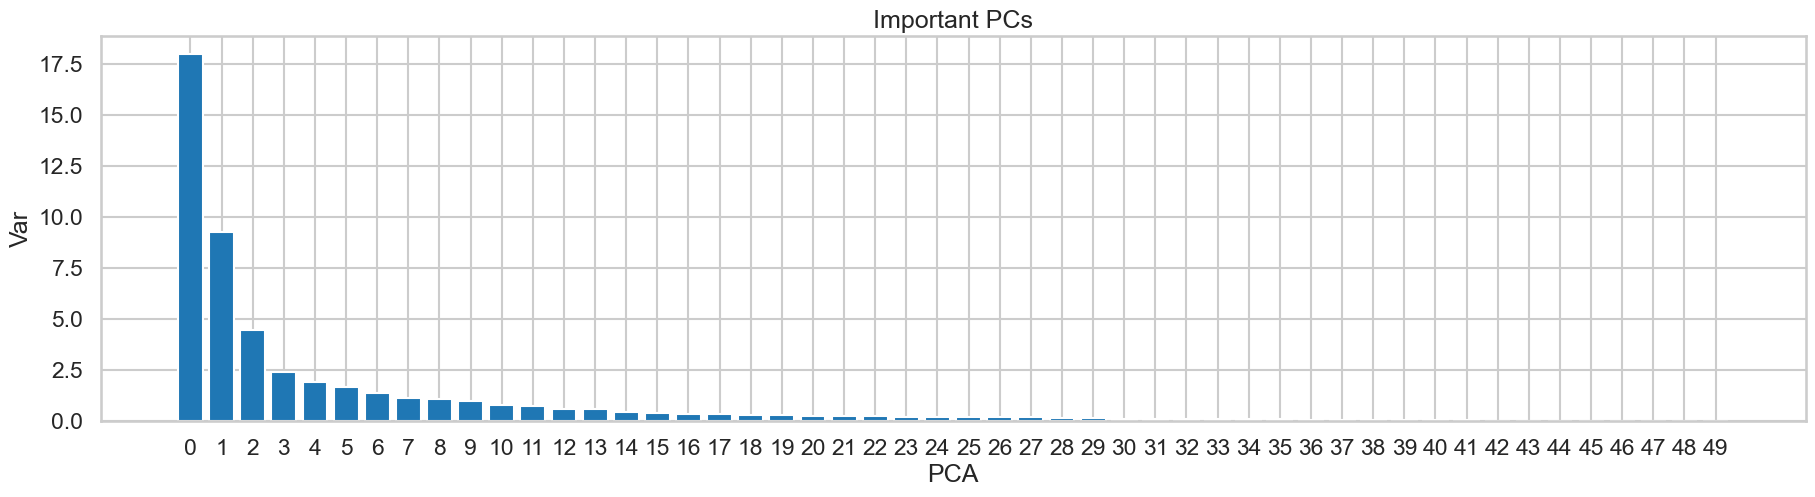

In [17]:
features = range(pca.n_components_)
_ = plt.figure(figsize=(22, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA')
_ = plt.ylabel('Var')
_ = plt.xticks(features)
_ = plt.title("Important PCs")
plt.show()

In [70]:
df_1=df[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04','sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09']]
df_2=df[['sensor_10','sensor_11', 'sensor_12', 'sensor_13', 'sensor_14','sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20']]
df_3=df[['sensor_21','sensor_22', 'sensor_23', 'sensor_24', 'sensor_25','sensor_26','sensor_27', 'sensor_28', 'sensor_29', 'sensor_30','sensor_31','rul']]
df_4=df[['sensor_32', 'sensor_33', 'sensor_34', 'sensor_35','sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40','sensor_41', 'sensor_42','rul']]
df_5=df[[ 'sensor_43','sensor_44', 'sensor_45','sensor_46', 'sensor_47', 'sensor_48', 'sensor_49','sensor_51','rul']]

<AxesSubplot: >

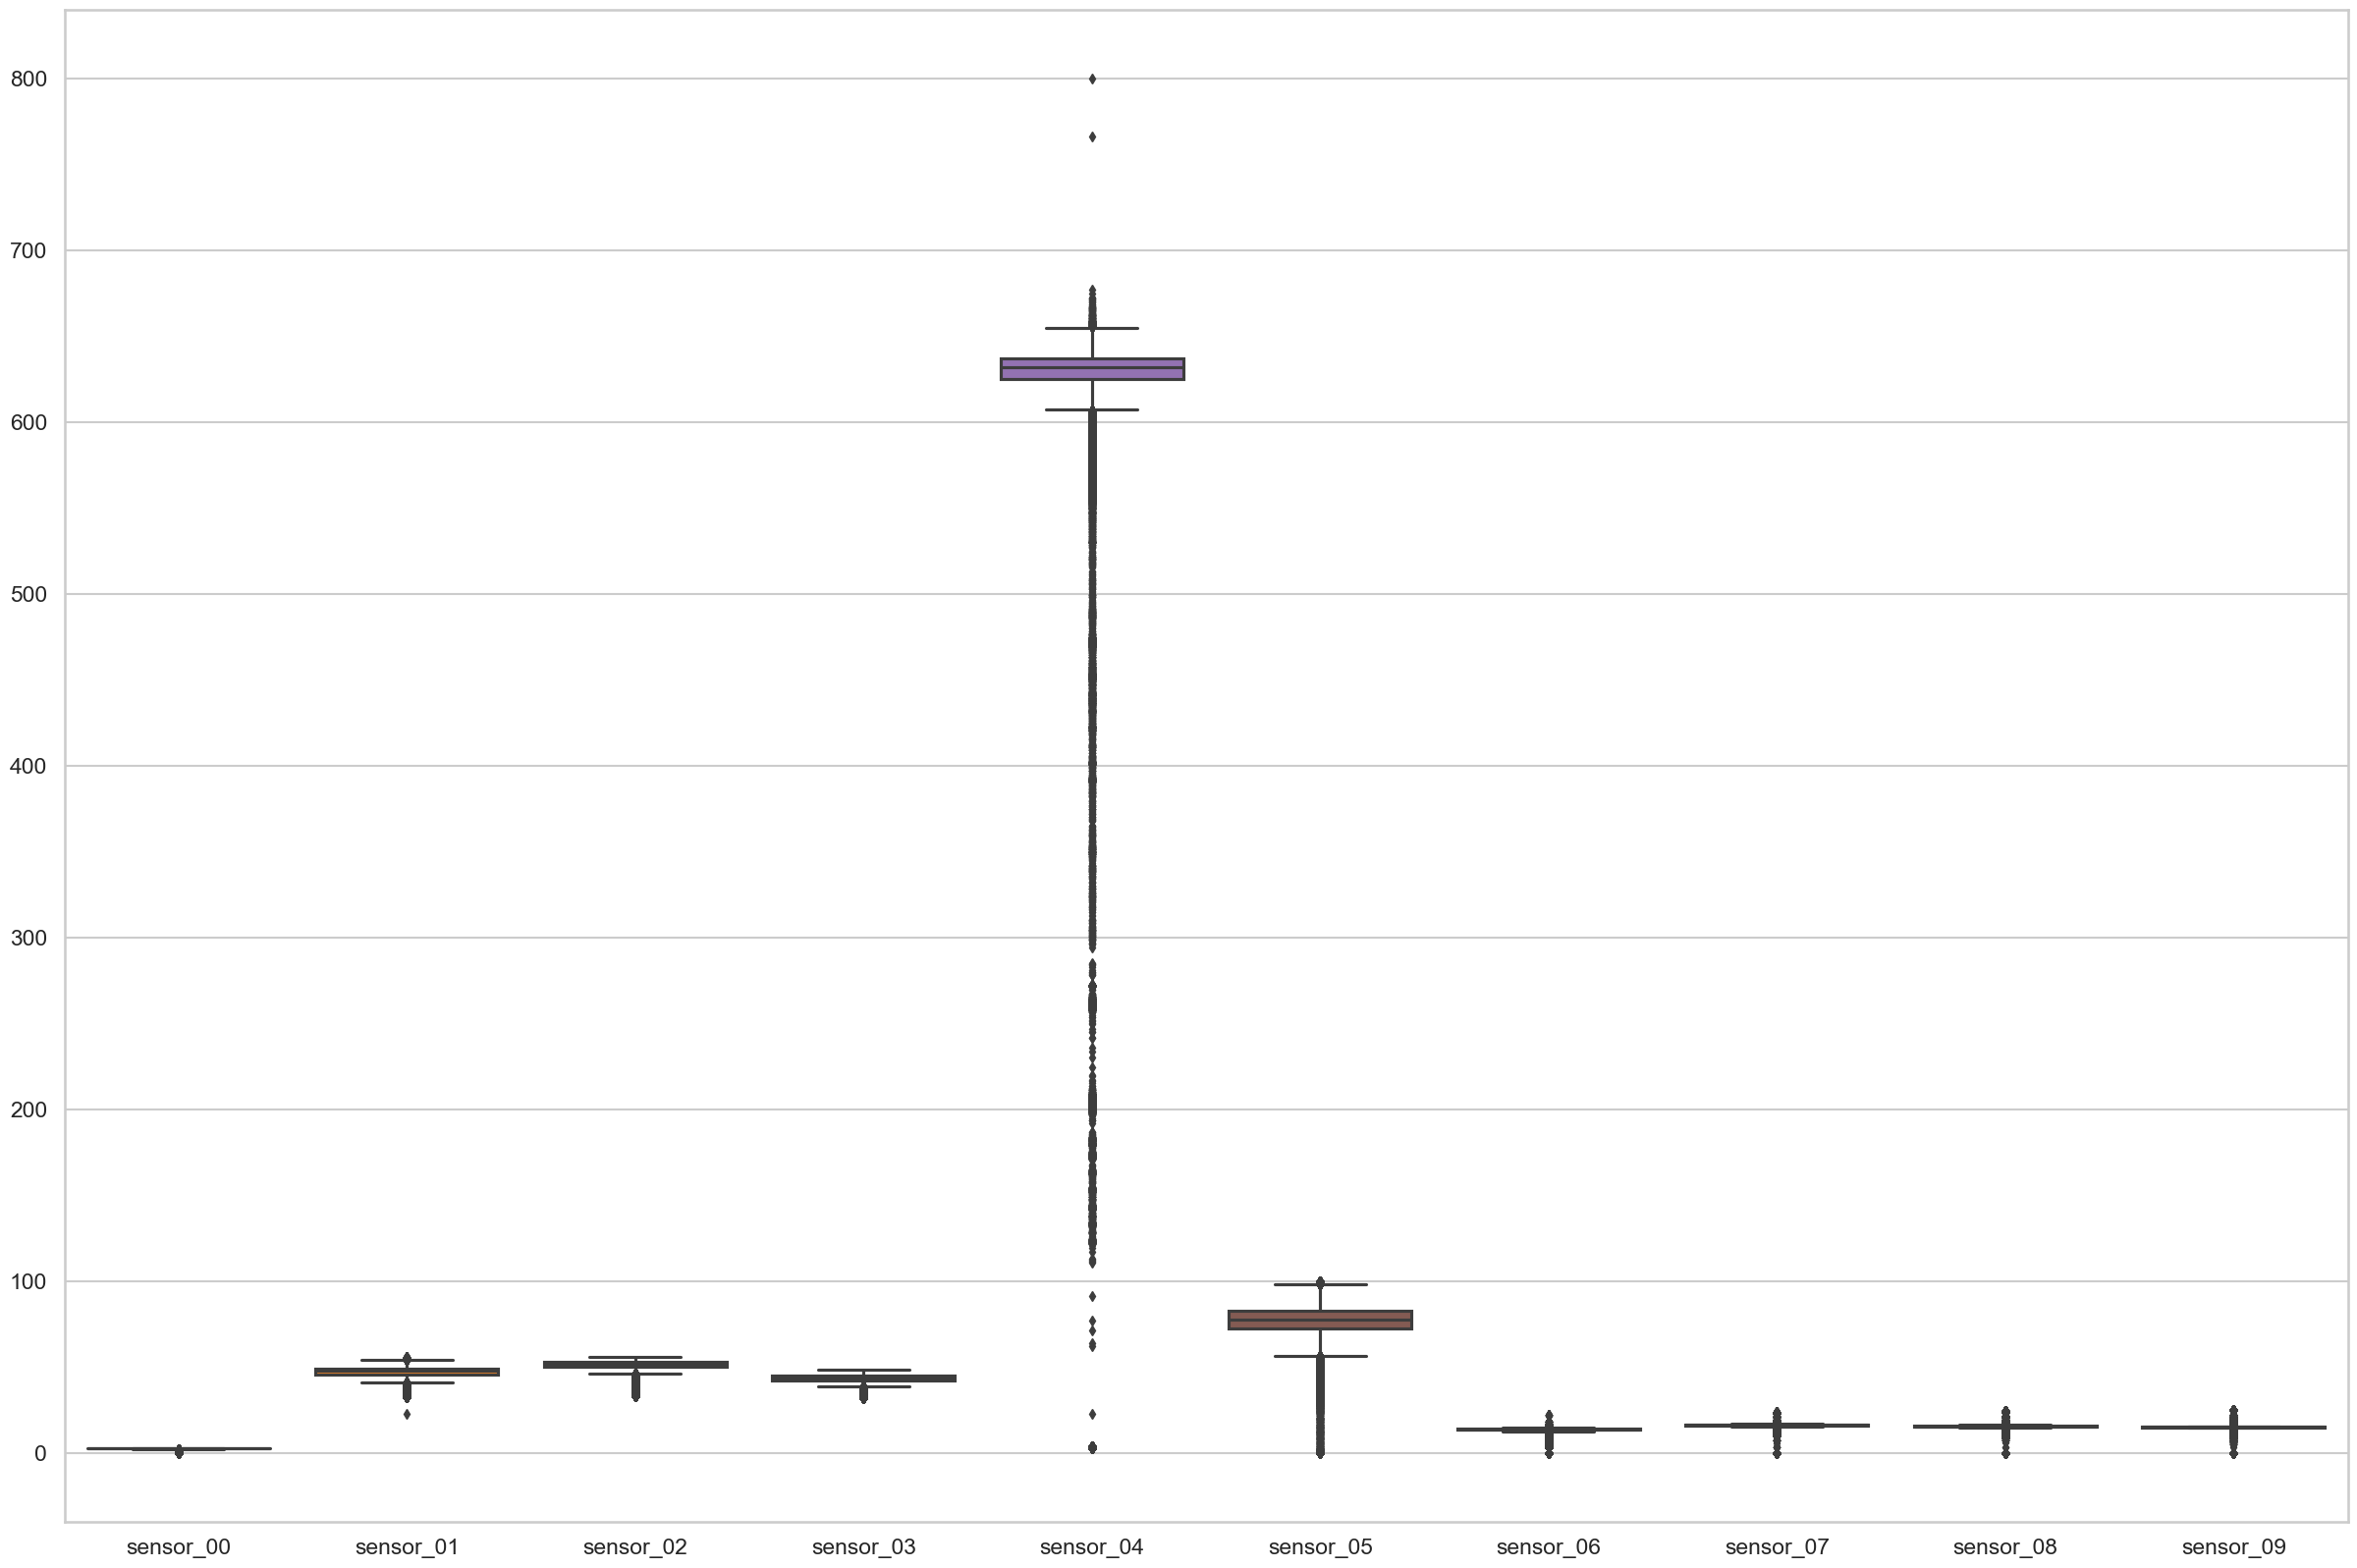

In [71]:
plt.figure(figsize=(30,20))
sns.boxplot(data=df_1)

<AxesSubplot: >

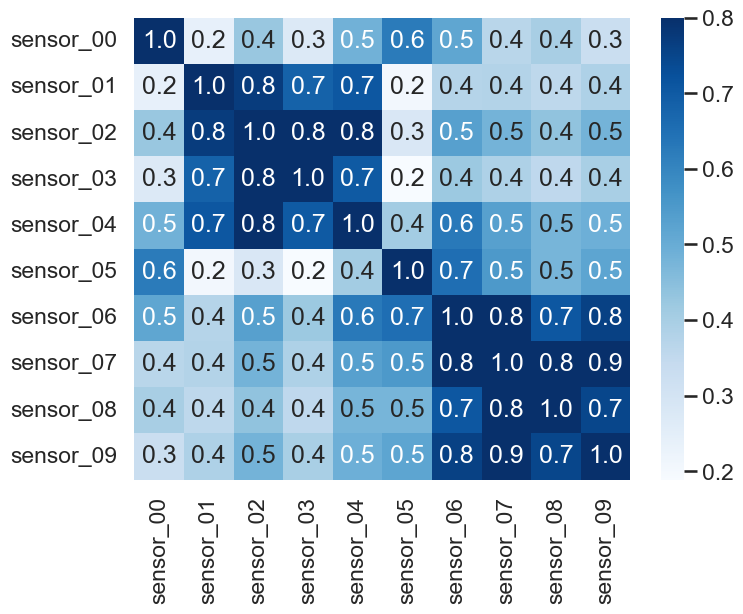

In [40]:
plt.figure(figsize=(8,6))
correlation=df_1.corr()
sns.heatmap(correlation,cbar=True,fmt='.1f',vmax=0.8,annot=True,cmap='Blues')